<a href="https://colab.research.google.com/github/AdrianaCaetano/AI/blob/main/Assignment1/571AI_Assign1_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
CS 571 AI - Prof Gutta

Author Adriana Caetano - Spring 2022

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cbook import index_of
from numpy.core.numeric import False_

class Cluster:
    """ A Class to find circle clusters """
       
    def __init__(self, circles_tuple):
        self.circles = circles_tuple    # tuple of circles with coordinates x, y, and radius
        self.clusters = dict()          # a dictionary to hold how many clusters are in this tuple


    def draw_circles(self):
        """ Draw all circles from this list on the same plot """

        figure, axes = plt.subplots()
    
        for x, y, R in self.circles:
            drawing_circle = plt.Circle( (x,y), (R), fill = False)

            axes.set_aspect (1)
            axes.add_artist(drawing_circle)

        plt.title("Circles")
        plt.show()

    def circle_coord(self):
        """ Print circle coordinates: center_x, center_y, and radius """
        i = 0
        print("Circle:  [ center_x , center_y , radius ]")
        for c in self.circles:
            print('Circle', i, ":", c)
            i += 1


    def check_intersec(self,c1, c2):
        """
        Check if c1 and c2 have an intersection

        Two circles only intersect if the distance between their centers is smaller the the sum of their radius
        (R0 - R1)^2 <= (x0 - x1)^2 + (y0 - y1)^2 <= (R0 + R1)^2
        or
        ABS(R0 - R1) <= SQRT((x0 - x1)^2 + (y0 - y1)^2) <= (R0 + R1)
        If one circle is inside the other they don't intersect and do not form a cluster.
        """

        x1, y1, R1 = c1
        x2, y2, R2 = c2

        sqr_dist = ((x1 - x2)**2 + (y1-y2)**2 )
    
        if (R1 - R2)**2 <= sqr_dist and sqr_dist <= (R1 + R2)**2:
            return True
        else:
            return False


    def add_dif_cluster(self, c1, c2):
        """ 
        Add circles into different clusters.
        When circles do not intersect, add them into the distinct clusters' dictionary.
        Check if the circles are already in a cluster, if not, create a new cluster
        for the circle  
        If none of the circles are in a cluster, create two new clusters. 
        """

        #print("Add circles into different clusters")
        if (len(self.clusters) == 0):
            # dictionary is empty, save both circles into two separate clusters
            self.clusters[0] = [c1]
            self.clusters[1] = [c2]
            
        else:
            # check if circles are already in any cluster and get the equivalent key
            key_c1 = -1
            key_c2 = -1

            for key, value in self.clusters.items():
                if (c1 == value) or (c1 in value):
                    key_c1 = key
                if (c2 == value) or (c2 in value):
                    key_c2 = key               

            #print("key c1 =", key_c1, "key c2 =", key_c2)

            if (key_c1 == -1):
                # add c1 into a new cluster
                index = len(self.clusters)
                self.clusters[index] = c1
            
            if (key_c2 == -1):
                # add c2 into a new cluster
                index = len(self.clusters)
                self.clusters[index] = c2

            # if (key_c1 != -1) and (key_c2 != -1):
            # both circles are already in some cluster, do nothing

        
        #print("Clusters:", clusters)

    def add_same_cluster(self, c1, c2):
        """ 
        Add circles into same cluster
        When two circles intersect, add them into the apropriate clusters dictionary.
        Check if the circles are already in a cluster, if both circles are 
        in different clusters, merge them. 
        If any of the circles are in a cluster, create a new cluster to insert them. 
        """

        #print("Add circles into same cluster")
        if (len(self.clusters) == 0):
            # dictionary is empty, save both circles into the first cluster
            self.clusters[0] = [c1, c2]
            
        else:
            # check if circles are already in any cluster and get the equivalent key
            key_c1 = -1
            key_c2 = -1

            for key, value in self.clusters.items():
                if (c1 == value) or (c1 in value):
                    key_c1 = key
                if (c2 == value) or (c2 in value):
                    key_c2 = key
        
            #print("key c1 =", key_c1, "key c2 =", key_c2)

            if (key_c1 != -1) and (key_c2 == -1):
                # add c2 into c1 cluster
                self.clusters[key_c1].append(c2)
            
            elif (key_c2 != -1) and (key_c1 == -1):
                # add c1 into c2 cluster
                self.clusters[key_c2].append(c1)

            elif (key_c1 != -1) and (key_c2 != -1) and (key_c1 != key_c2):
                # circles are not in the same cluster, merge clusters
                if (key_c1 < key_c2):
                    # merge c2 cluster into c1 cluster, and delete c2 cluster
                    self.clusters[key_c1].append(self.clusters[key_c2])
                    del self.clusters[key_c2]
                else:
                    # merge c1 cluster into c2 cluster, and delete c1 cluster
                    self.clusters[key_c2].append(self.clusters[key_c1])
                    del self.clusters[key_c1]
        
        #print("Clusters:", clusters)



    def find_clusters(self):
        """ 
        Iterate through the list of circles and check all circles' intersections.
        When two circles intersect, add them to the appropriate clusters' dictionary 
        """
        
        self.draw_circles()
        self.circle_coord()

        if (len(self.circles) == 0):
            print("No circles to form a cluster")
            return False

        elif (len(self.circles) == 1):
            print("One circle cannot form a cluster")
            return False

        else: 
            print ("Two or more circles:")
            j = len(self.circles)-1
            i = 0
            while j > 0:
                while i < j: 
                    #print("Checking intersection of circles", i, "and", j)

                    if ( self.check_intersec(self.circles[i], self.circles[j]) ):
                        # circle i intersects with circle j
                        self.add_same_cluster(self.circles[i], self.circles[j])
                    
                    else:
                        # circles do not intersect, add them into different clusters
                        self.add_dif_cluster(self.circles[i], self.circles[j])

                    i += 1
                
                #update variables for next iteration
                j -= 1 # update j
                i = 0 # reset i

            print("Clusters: ", self.clusters)

            if len(self.clusters) == 1:
                return True
            else:
                return False   
    

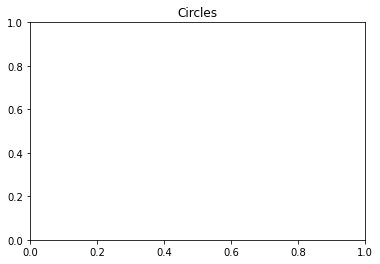

Circle:  [ center_x , center_y , radius ]
No circles to form a cluster
Test 0: False


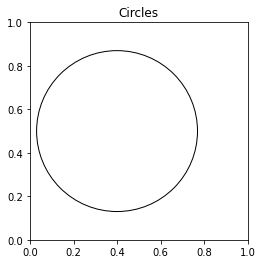

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.4, 0.5, 0.37]
One circle cannot form a cluster
Test 1: False


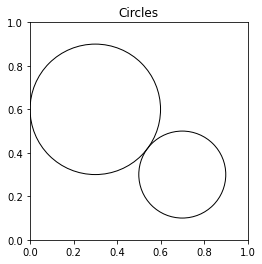

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.7, 0.3, 0.2]
Circle 1 : [0.3, 0.6, 0.3]
Two or more circles:
Clusters:  {0: [[0.7, 0.3, 0.2], [0.3, 0.6, 0.3]]}
Test 2: True


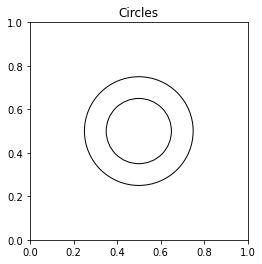

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.5, 0.5, 0.15]
Circle 1 : [0.5, 0.5, 0.25]
Two or more circles:
Clusters:  {0: [[0.5, 0.5, 0.15]], 1: [[0.5, 0.5, 0.25]]}
Test 3: False


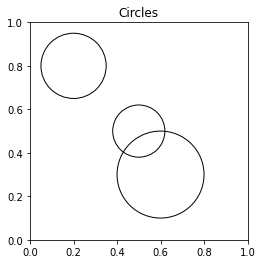

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.6, 0.3, 0.2]
Circle 1 : [0.2, 0.8, 0.15]
Circle 2 : [0.5, 0.5, 0.12]
Two or more circles:
Clusters:  {0: [[0.6, 0.3, 0.2], [0.5, 0.5, 0.12]], 1: [0.2, 0.8, 0.15]}
Test 4: False


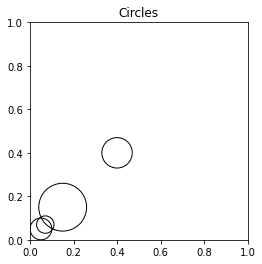

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.05, 0.05, 0.05]
Circle 1 : [0.15, 0.15, 0.11]
Circle 2 : [0.07, 0.07, 0.04]
Circle 3 : [0.4, 0.4, 0.07]
Two or more circles:
Clusters:  {0: [[0.05, 0.05, 0.05], [0.07, 0.07, 0.04], [0.15, 0.15, 0.11]], 1: [[0.4, 0.4, 0.07]]}
Test 5: False


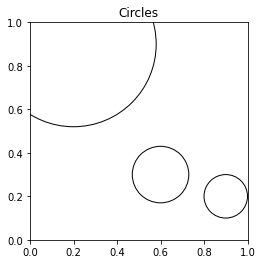

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.6, 0.3, 0.13]
Circle 1 : [0.2, 0.9, 0.38]
Circle 2 : [0.9, 0.2, 0.1]
Two or more circles:
Clusters:  {0: [[0.6, 0.3, 0.13]], 1: [[0.9, 0.2, 0.1]], 2: [0.2, 0.9, 0.38]}
Test 6: False


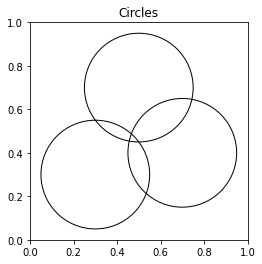

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.3, 0.3, 0.25]
Circle 1 : [0.5, 0.7, 0.25]
Circle 2 : [0.7, 0.4, 0.25]
Two or more circles:
Clusters:  {0: [[0.3, 0.3, 0.25], [0.7, 0.4, 0.25], [0.5, 0.7, 0.25]]}
Test 7th : True


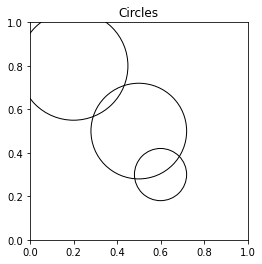

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.6, 0.3, 0.12]
Circle 1 : [0.5, 0.5, 0.22]
Circle 2 : [0.2, 0.8, 0.25]
Two or more circles:
Clusters:  {0: [[0.6, 0.3, 0.12], [[0.2, 0.8, 0.25], [0.5, 0.5, 0.22]]]}
Test 8: True


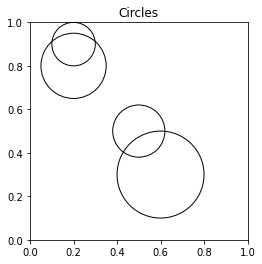

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.2, 0.9, 0.1]
Circle 1 : [0.2, 0.8, 0.15]
Circle 2 : [0.6, 0.3, 0.2]
Circle 3 : [0.5, 0.5, 0.12]
Two or more circles:
Clusters:  {0: [[0.2, 0.9, 0.1], [0.2, 0.8, 0.15]], 1: [[0.5, 0.5, 0.12], [0.6, 0.3, 0.2]]}
Test 9: False


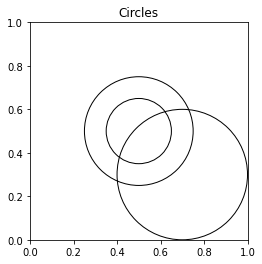

Circle:  [ center_x , center_y , radius ]
Circle 0 : [0.5, 0.5, 0.15]
Circle 1 : [0.5, 0.5, 0.25]
Circle 2 : [0.7, 0.3, 0.3]
Two or more circles:
Clusters:  {0: [[0.5, 0.5, 0.15], [0.7, 0.3, 0.3], [0.5, 0.5, 0.25]]}
Test 10: True


In [ ]:
# Tuples for test cases
circles0 = tuple (( ))
circles1 = tuple (( [.4,.5,0.37], ))
circles2 = tuple (( [.7,.3,0.2], [.3,.6,.3] ))
circles3 = tuple (( [.5,.5,.15], [.5,.5,.25] ))
circles4 = tuple (( [.6,.3,.2], [.2,.8,.15], [.5,.5,.12] ))
circles5 = tuple (( [.05,.05,0.05], [.15,.15,0.11], [.07,.07,0.04], [.4,.4,0.07] ))
circles6 = tuple (( [.6,.3,.13], [.2,.9,.38], [.9,.2,.1] )) # [.5,.5,.15],
circles7 = tuple (( [.3,.3,.25], [.5,.7,.25], [.7,.4,.25] ))
circles8 = tuple (( [.6,.3,.12], [.5,.5,.22], [.2,.8,.25] ))
circles9 = tuple (( [.2,.9,.1], [.2,.8,.15], [.6,.3,.2], [.5,.5,.12],  ))
circles10 = tuple (( [.5,.5,.15], [.5,.5,.25], [.7,.3,.3] ))

c0 = Cluster(circles0)
print ("Test 0:", c0.find_clusters())
c1 = Cluster(circles1)
print ("Test 1:", c1.find_clusters())
c2 = Cluster(circles2)
print ("Test 2:", c2.find_clusters())
c3 = Cluster(circles3)
print ("Test 3:", c3.find_clusters())
c4 = Cluster(circles4)
print ("Test 4:", c4.find_clusters())
c5 = Cluster(circles5)
print ("Test 5:", c5.find_clusters())
c6 = Cluster(circles6)
print ("Test 6:", c6.find_clusters())
c7 = Cluster(circles7)
print ("Test 7th :", c7.find_clusters())
c8 = Cluster(circles8)
print ("Test 8:", c8.find_clusters())
c9 = Cluster(circles9)
print ("Test 9:", c9.find_clusters())
c10 = Cluster(circles10)
print ("Test 10:", c10.find_clusters())